# Advertising Dataset analysis with visualisations

#### As an advertising manager, I want to know which group of Customers is most likely to click on ads on my site, so that we can better target them with selected ads to increase the advertising revenue.

In [88]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the data
adv_data = pd.read_csv('advertising.csv')
adv_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [89]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


#### The dataset contains 1000 records of observations of a company. It shows the personal Customers information as well as wheater or not they were interested in an advertisement.
#### We want to see the specific Consumer target group of ads.

### How does age affect the Consumer's decision?

In [10]:
#brief summary of the 'Age' column data
adv_data['Age'].describe()

count    1000.000000
mean       36.009000
std         8.785562
min        19.000000
25%        29.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64

In [170]:
#creating 'Age category'

def category(x):
    if x<=25:
        return '15 - 25'
    elif x<=35:
        return '26 - 35'
    elif x<=45:
        return '36 - 45'
    elif x<=55:
        return '46 - 55'
    else:
        return '56 +'

adv_data['Age_category']=adv_data['Age'].apply(lambda x: category(x))
age_category = adv_data.groupby('Age_category').Age.count().to_frame()
age_category

,Age
Age_category,
15 - 25,98
26 - 35,424
36 - 45,321
46 - 55,138
56 +,19


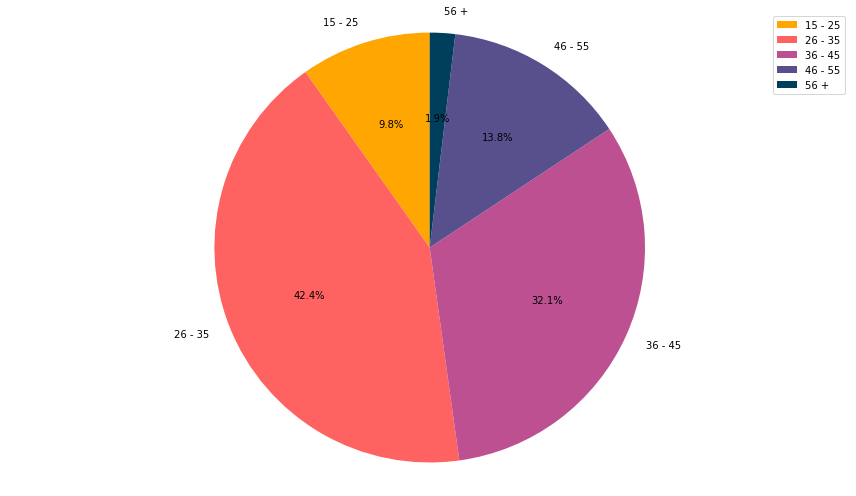

In [163]:
#who is our Customer?

fig1, ax1 = plt.subplots(figsize=(12,7))
colors = ['#ffa600','#ff6361','#bc5090','#58508d', '#003f5c']
ax1.pie(age_category['Age'], colors=colors, labels=['15 - 25','26 - 35','36 - 45','46 - 55','56 +'], autopct='%1.1f%%', startangle=90)

ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout()
plt.legend()
plt.show()

#### We can initially assume the target group of our advertisement to be the age group of 26-35 years. Second to highest target group would be the age of 36-45 years.

In [56]:
by_age = adv_data.groupby('Age_category').mean().round(2)
by_age.reset_index(level=0, inplace=True)
by_age

,Age_category,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,15 - 25,69.60,23.08,52901.65,195.23,0.55,0.21
1,26 - 35,69.98,30.53,57733.90,195.41,0.48,0.31
2,36 - 45,61.70,39.92,55348.94,166.72,0.46,0.64
3,46 - 55,54.80,49.87,48590.99,155.12,0.49,0.90
4,56 +,60.17,58.16,45468.32,162.59,0.42,1.00


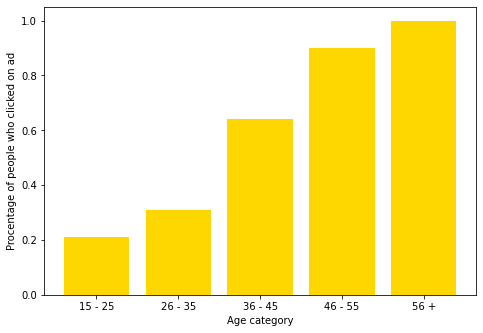

In [148]:
#which group is clicking on the ad?

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
age = by_age['Age_category']
procentage = by_age['Clicked on Ad']
ax.bar(age, procentage, color='gold')

ax.set_xlabel('Age category')
ax.set_ylabel('Procentage of people who clicked on ad')
plt.show()

#### These figures indicate that the older the Customer is, the higher chance that he/she is going to click on the ad. Our target group (26 - 35 years old) is only 30% likely to do so.

Text(0.5, 1.0, 'Age wise distribution of Ad clicks')

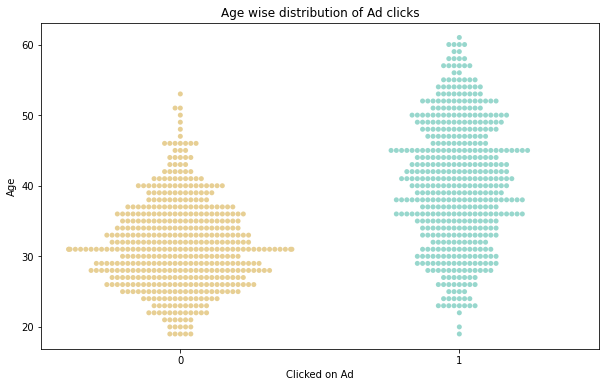

In [169]:
plt.figure(figsize=(10,6))
sns.swarmplot(x=adv_data['Clicked on Ad'], y= adv_data['Age'], data=adv_data, palette='BrBG')
plt.title('Age wise distribution of Ad clicks')

####  The 'clickers' distribution confirms that the youngs are not willing to click on ads. Considering the above 2 graphs, we can conclude that the largest group of Consumers who clicks on the ads are 36 - 55 years old. 

### How does income affect the Consumer's decision?

In [5]:
#brief summary of the 'Income' column data
adv_data['Area Income'].describe()

count     1000.000000
mean     55000.000080
std      13414.634022
min      13996.500000
25%      47031.802500
50%      57012.300000
75%      65470.635000
max      79484.800000
Name: Area Income, dtype: float64

In [73]:
#creating 'Income category'

def money(x):
    if x<=25000:
        return '0-25.000'
    elif x<=40000:
        return '25.000-40.000'
    elif x<=55000:
        return '40.000-55.000'
    elif x<=70000:
        return '55.000-70.000'
    else:
        return '70.000 +'


adv_data['Income_category']=adv_data['Area Income'].apply(lambda x: money(x))

income_category = adv_data.groupby('Income_category')['Area Income'].count().to_frame()
income_category

,Area Income
Income_category,
0-25.000,27
25.000-40.000,119
40.000-55.000,295
55.000-70.000,444
70.000 +,115


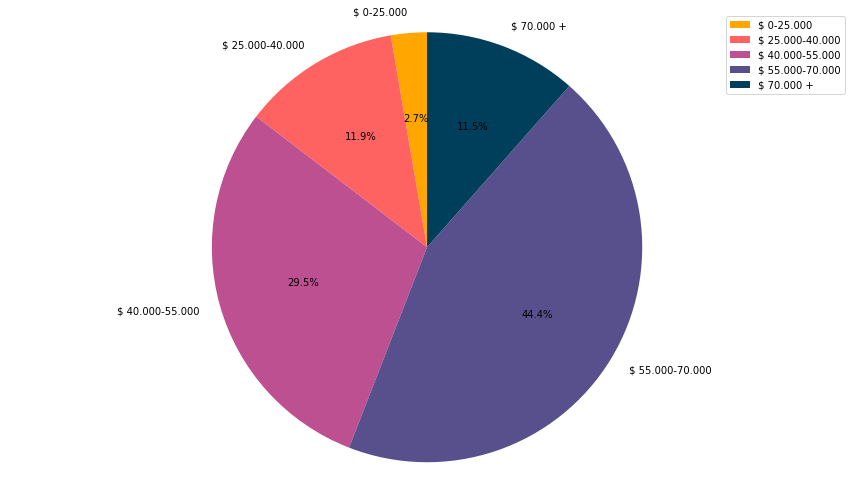

In [164]:
#who is our Customer?

fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(income_category['Area Income'], colors=colors, labels=['$ 0-25.000','$ 25.000-40.000','$ 40.000-55.000','$ 55.000-70.000','$ 70.000 +'], autopct='%1.1f%%', startangle=90)

ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle 
plt.tight_layout()
plt.legend()
plt.show()

#### We can initially consider the target group of our advertisement to be people with yearly salary of 55.000-70.000 dollars. 
#### Second to highest target group would be people with yearly salary of 40.000-55.000 dollars.

In [78]:
by_income = adv_data.groupby('Income_category').mean().round(2)
by_income.reset_index(level=0, inplace=True)
by_income

,Income_category,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,0-25.000,58.03,41.63,20814.59,160.62,0.44,1.00
1,25.000-40.000,55.89,39.09,33258.06,152.82,0.44,0.92
2,40.000-55.000,60.75,36.91,48508.80,167.78,0.52,0.65
3,55.000-70.000,69.89,34.02,62445.60,193.29,0.49,0.32
4,70.000 +,68.10,36.88,73429.15,192.73,0.43,0.26


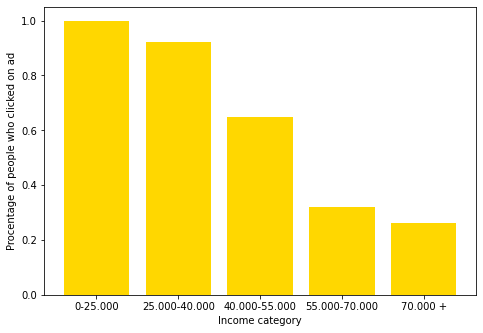

In [149]:
#which group is clicking on the ad?

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
income = by_income['Income_category']
procentage = by_income['Clicked on Ad']
ax.bar(income, procentage, color='gold')

ax.set_xlabel('Income category')
ax.set_ylabel('Procentage of people who clicked on ad')
plt.show()

#### These figures indicate that the more money the Customer makes, the lower chance that he/she is going to click on the ad. 
#### The biggest group of our Customers (55.000-70.000 dollars category) shows only 30% likelyhood on clicking on the ad.

Text(0.5, 1.0, 'Income wise distribution of Ad clicks')

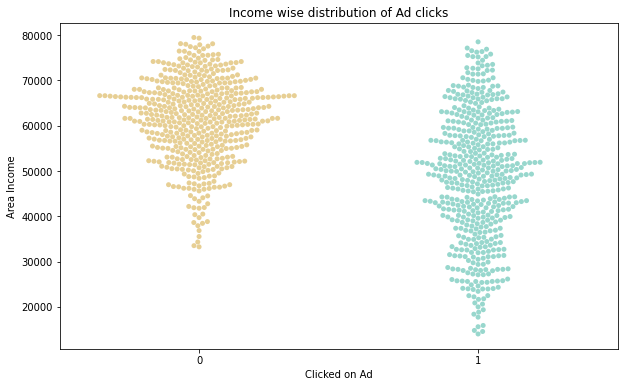

In [173]:
plt.figure(figsize=(10,6))
sns.swarmplot(x=adv_data['Clicked on Ad'], y= adv_data['Area Income'], data=adv_data, palette='BrBG')
plt.title('Income wise distribution of Ad clicks')

#### The above distribution confirms that the wealthy are not willing to click on ads. Considering the above 2 graphs, we can conclude that the largest group of Consumers who clicks on the ads make 40.000-55.000 dollars a year.

In [104]:
sex_category = adv_data.groupby('Male')['Male'].count().to_frame()
sex_category

,Male
Male,
0,519
1,481


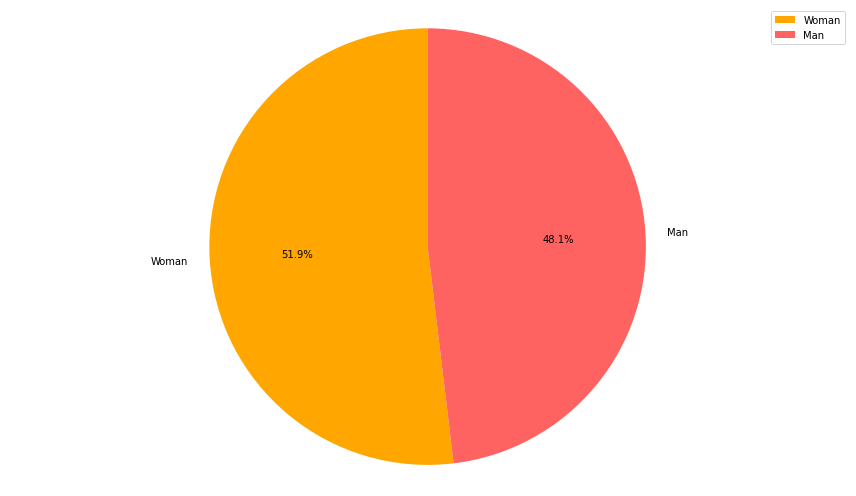

In [165]:
fig1, ax1 = plt.subplots(figsize=(12,7))
ax1.pie(sex_category['Male'], colors=colors, labels=['Woman', 'Man'], autopct='%1.1f%%', startangle=90)

ax1.axis('equal')
plt.tight_layout()
plt.legend()
plt.show()

#### We can conclude that there is slightly more women Customers on the site. Both genders should be consider the target group.

In [114]:
by_sex = adv_data.groupby('Male').mean()
by_sex.rename(index={0: 'Woman', 1: 'Man'}, inplace=True)
by_sex.reset_index(level=0, inplace=True)
by_sex

,Male,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,Woman,65.289287,36.186898,54982.931407,178.816763,0.518304
1,Man,64.688274,35.817048,55018.417214,181.276923,0.480249


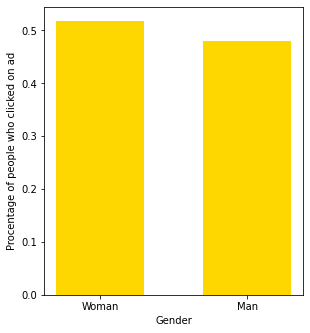

In [150]:
#which sex is clicking on the ad more?

fig = plt.figure()
ax = fig.add_axes([0,0,0.6,1])
sex = by_sex['Male']
procentage = by_sex['Clicked on Ad']
ax.bar(sex, procentage, width=0.6, color='gold')

ax.set_xlabel('Gender')
ax.set_ylabel('Procentage of people who clicked on ad')
plt.show()

#### Woman tends to click more on ads then man. Also, we concluded that there is more women Customers on the site. Notwithstanding the difference is insignificant, therefore the gender does not play as an important factor in this case.

### When are Consumers active?

Text(0.5, 1.0, 'Ad clicked hourly distribution')

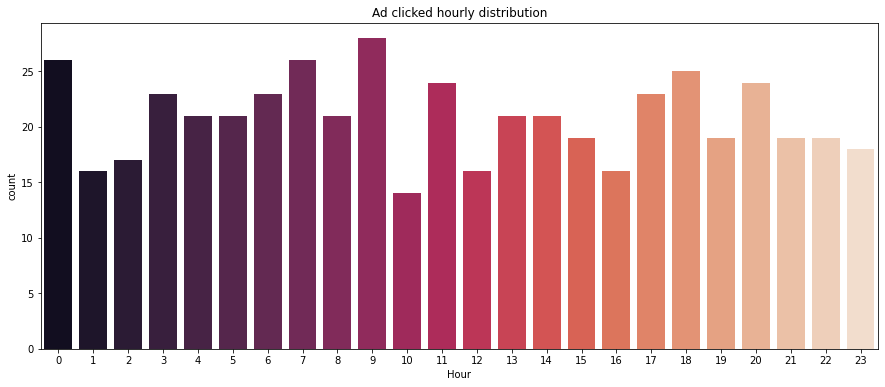

In [147]:
adv_data['Timestamp']=pd.to_datetime(adv_data['Timestamp'])
adv_data['Hour']=adv_data['Timestamp'].apply(lambda time : time.hour)

plt.figure(figsize=(15,6))
sns.countplot(x='Hour', data=adv_data[adv_data['Clicked on Ad']==1], palette='rocket')
plt.title('Ad clicked hourly distribution')

#### The distribution shows that the most active hours for ads are 00:00, 07:00, 09:00 and 18:00.

Text(0.5, 1.0, 'Ad clicked daily distribution')

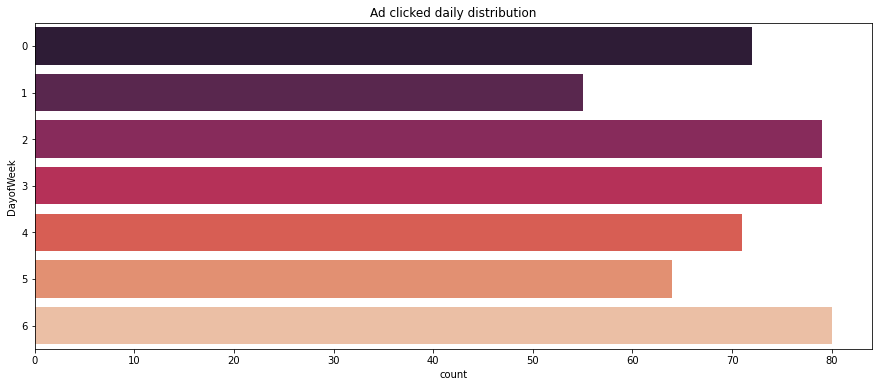

In [146]:
adv_data['DayofWeek'] = adv_data['Timestamp'].apply(lambda time : time.dayofweek)

plt.figure(figsize=(15,6))
sns.countplot(y='DayofWeek', data=adv_data[adv_data['Clicked on Ad']==1], palette='rocket')
plt.title('Ad clicked daily distribution')

#### The above graph indicates that the Customers click on the ads the most actively on Wednesdays, Thursdays and Sundays.

### The recommendations for advertisements from the above analysis would be to target Customers, who:
### - are 36 - 55 years old
### - make 40.000-55.000 dollars a year
### - both man and woman.

### The most atractive time for placing the ads is:
### 00:00, 07:00, 09:00 and 18:00 on Wednesdays, Thursdays and Sundays.